In [1]:
#Cargando librerías de manipulación y visualización de datos
import pandas as pd
from pathlib import Path
import sys
import numpy as np
# Usamos la carpeta actual del notebook como punto de partida
   # sube un nivel desde notebooks/
root_dir = Path().resolve().parent
sys.path.append(str(root_dir))

from codes.model_predictor import ModelPredictor

model_predictor = ModelPredictor()

/home/cesar/Escritorio/Challenge Meli/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
df = model_predictor.lectura_csv()

2025-10-02 17:41:49,460 [INFO] Leyendo CSV desde: /home/cesar/Escritorio/Challenge Meli/test_meli/data/data_to_model.csv


In [3]:
df.shape

(99926, 16)

In [4]:
X_train, X_test, y_train, y_test  = model_predictor.train_test_split(df,'sold_quantity')

In [5]:
rf_fit = model_predictor.train_model(X_train, y_train,"rf")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.4s
[CV] END max_depth=5, min_samples_leaf

In [6]:
xgb_fit = model_predictor.train_model(X_train, y_train,"xgb")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/cesar/Escritorio/Challenge Meli/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/cesar/Escritorio/Challenge Meli/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'many

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estima

In [7]:
model_predictor.test_model(X_test,y_test,rf_fit.best_estimator_)

(0.024307407736169684, 29.432471028526738)

In [8]:
model_predictor.test_model(X_test,y_test,xgb_fit.best_estimator_)

(-0.013024951001326057, 29.990264252558507)

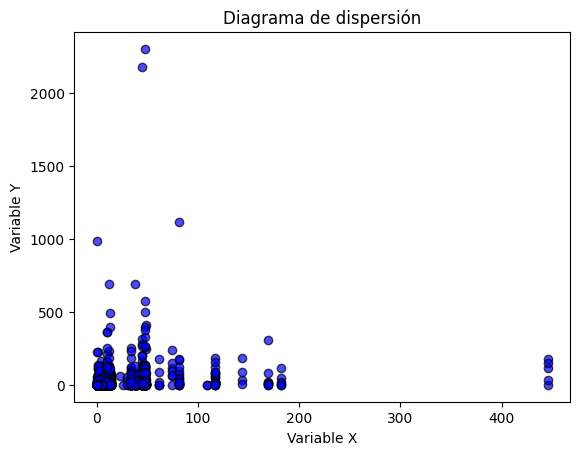

In [10]:
import matplotlib.pyplot as plt

# Ejemplo de datos
x = rf_fit.best_estimator_.predict(X_test)

# Crear scatter plot
plt.scatter(x, y_test, color="blue", alpha=0.7, edgecolors="black")

plt.title("Diagrama de dispersión")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()
